# Naive Bayes' Classifier

In [1]:
import itertools
import functools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(1234)
%matplotlib inline

## Bernoulli NB

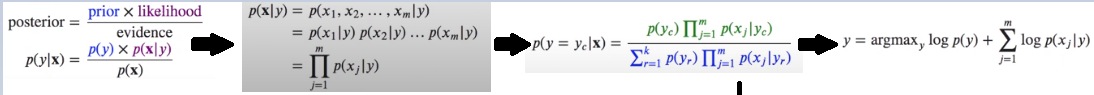
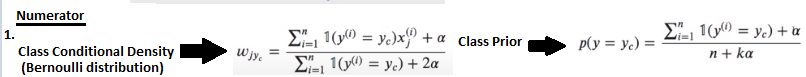
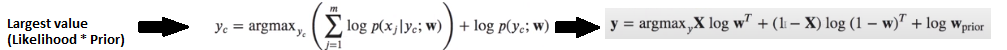

**NOTE :** In the estimation of $w_{jy_c}$ : We have vectorized the operation and we obtain $w_{y_c}$ that contains $w_{jy_c}$ for each $x_j$

In [8]:
def fit(X, y) :
    alpha = 1 # Laplace Smoothing
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    w = np.zeros((n_classes, n_features), dtype=np.float64)
    w_priors = np.zeros(n_classes, dtype=np.float64)
    
    for c in range(n_classes) :
        X_c = X[y == c]
        # Refer NOTE
        w[c: ,] = (np.sum(X_c, axis=0) + alpha) / (X_c.shape[0] + n_classes * alpha)
        w_priors[c] = (X_c.shape[0] + alpha) / (float(n_samples) + n_classes * alpha)
        
        print("\nWeight Vector : \n", w)
        print("\nPrior : \n", w_priors)
        
    return w, w_priors

# Testing
X = np.array([[1,0],[0,1],[0,1],[1,0]])
y = np.array([1,0,0,1])
fit(X, y)


Weight Vector : 
 [[0.25 0.75]
 [0.25 0.75]]

Prior : 
 [0.5 0. ]

Weight Vector : 
 [[0.25 0.75]
 [0.75 0.25]]

Prior : 
 [0.5 0.5]


(array([[0.25, 0.75],
        [0.75, 0.25]]),
 array([0.5, 0.5]))

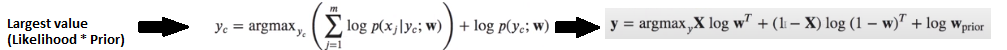

In [27]:
class BernoulliNB() :
    def __init__(self, alpha=1.0) :
        self.alpha = alpha
        
    def fit(self, X, y) :
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for c in range(n_classes) :
            X_c = X[y == c]
            # Refer NOTE
            self.w[c: ,] = (np.sum(X_c, axis=0) + self.alpha) / (X_c.shape[0] + n_classes * self.alpha)
            self.w_priors[c] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

            print("\nClass Conditional Density : \n", self.w)
            print("\nPrior : \n", self.w_priors)

        return self.w, self.w_priors
    
    def log_likelihood_prior_prod(self, X) :
        return X @ np.log(self.w.T) + (1 - X) @ np.log(1 - self.w.T) + np.log(self.w_priors.T)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)

#### Binary Classification with BernoulliNB Example

In [35]:
X = np.array([[1,0],[0,1],[0,1],[1,0]])
y = np.array([1,0,0,1])

bernoulli_nb = BernoulliNB()
print("FIT : ")
print(bernoulli_nb.fit(X, y))
print("\nPREDICT : ")
print(bernoulli_nb.predict(X)) # Note the prediction is matching with the input labels
print("\nLOG LIKELIHOOD PRIOR PROD : ")
print(bernoulli_nb.log_likelihood_prior_prod(X))
print("\nPREDICTED PROBABILITIES : ")
print(bernoulli_nb.predict_proba(X))

FIT : 

Class Conditional Density : 
 [[0.25 0.75]
 [0.25 0.75]]

Prior : 
 [0.5 0. ]

Class Conditional Density : 
 [[0.25 0.75]
 [0.75 0.25]]

Prior : 
 [0.5 0.5]
(array([[0.25, 0.75],
       [0.75, 0.25]]), array([0.5, 0.5]))

PREDICT : 
[1 0 0 1]

LOG LIKELIHOOD PRIOR PROD : 
[[-3.4657359  -1.26851133]
 [-1.26851133 -3.4657359 ]
 [-1.26851133 -3.4657359 ]
 [-3.4657359  -1.26851133]]

PREDICTED PROBABILITIES : 
[[0.1 0.9]
 [0.9 0.1]
 [0.9 0.1]
 [0.1 0.9]]


#### Multi-class classification with Bernoulli Naive Bayes

In [36]:
X = np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y = np.array([1,0,0,1,2,2])

bernoulli_nb = BernoulliNB()
print("FIT : ")
print(bernoulli_nb.fit(X, y))
print("\nPREDICT : ")
print(bernoulli_nb.predict(X)) # Note the prediction is matching with the input labels
print("\nLOG LIKELIHOOD PRIOR PROD : ")
print(bernoulli_nb.log_likelihood_prior_prod(X))
print("\nPREDICTED PROBABILITIES : ")
print(bernoulli_nb.predict_proba(X))

FIT : 

Class Conditional Density : 
 [[0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]]

Prior : 
 [0.33333333 0.         0.        ]

Class Conditional Density : 
 [[0.2 0.6]
 [0.6 0.2]
 [0.6 0.2]]

Prior : 
 [0.33333333 0.33333333 0.        ]

Class Conditional Density : 
 [[0.2 0.6]
 [0.6 0.2]
 [0.6 0.6]]

Prior : 
 [0.33333333 0.33333333 0.33333333]
(array([[0.2, 0.6],
       [0.6, 0.2],
       [0.6, 0.6]]), array([0.33333333, 0.33333333, 0.33333333]))

PREDICT : 
[1 0 0 1 2 2]

LOG LIKELIHOOD PRIOR PROD : 
[[-3.62434093 -1.83258146 -2.52572864]
 [-1.83258146 -3.62434093 -2.52572864]
 [-1.83258146 -3.62434093 -2.52572864]
 [-3.62434093 -1.83258146 -2.52572864]
 [-3.21887582 -3.21887582 -2.12026354]
 [-3.21887582 -3.21887582 -2.12026354]]

PREDICTED PROBABILITIES : 
[[0.1 0.6 0.3]
 [0.6 0.1 0.3]
 [0.6 0.1 0.3]
 [0.1 0.6 0.3]
 [0.2 0.2 0.6]
 [0.2 0.2 0.6]]


## Gaussian NB

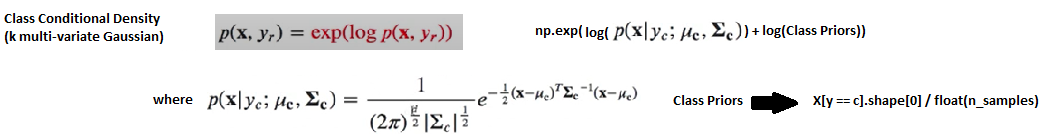

In [39]:
class gaussianNB() :
    def __init__(self, alpha=1.0):
            self.alpha = alpha
            
    def fit(self, X, y) :
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
    
    
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[c] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

        print("Mean:", self._mean)
        print("Variance:", self._var)
        print("Prior", self._priors)
        
    def _calc_pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2 * np.pi, X.shape[0] / 2) * np.power(np.linalg.det(var), 1/2)
        return (1/z) * np.exp(-0.5 * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))
    
    def _calc_prod_likelihood_prior(self, X):
        self.q = np.zeros((X.shape[0], len(self._classes)), dtype=np.float64)
        for x_idx, x in enumerate(X):
            for idx, c in enumerate(self._classes):
                self.q[x_idx, c] = (np.log(self._calc_pdf(idx, x)) + np.log(self._priors[idx]))
    
    def predict_proba(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.exp(self.q) / np.expand_dims(np.sum(np.exp(self.q), axis=1), axis=1)
    
    def predict(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.argmax(self.q, axis=1)

In [45]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, n_features=2, centers=[[5,5],[10,10]], cluster_std=1.5, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

gaussian_nb = gaussianNB()
print("FIT : \n")
print(gaussian_nb.fit(X, y))
print("\nPREDICT : \n")
print(gaussian_nb.predict(X))

from sklearn.metrics import classification_report
print()
print(classification_report(y_test, gaussian_nb.predict(X_test)))

FIT : 

Mean: [[ 4.55327074  5.13550586]
 [10.33985583 10.04486762]]
Variance: [[2.09245276 2.5775431 ]
 [3.36405042 2.13027877]]
Prior [0.5 0.5]
None

PREDICT : 

[0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0
 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Multinomial NB

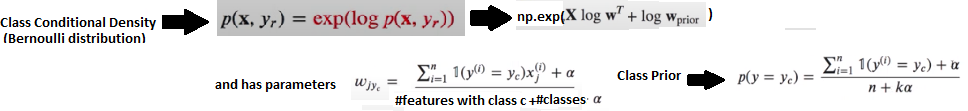

In [47]:
class MultinomialNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            total_count = np.sum(np.sum(X_c, axis=1))
            self.w[idx, :] = (np.sum(X_c, axis=0) + self.alpha) / (total_count + n_classes * self.alpha)
            self.w_priors[idx] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)